


# 🚀 PHASE 3: MULTI-ASSET PORTFOLIO SYSTEM

## Methodology & Research Outcomes (Final)

---

## 📌 EXECUTIVE OVERVIEW

### Objective

To develop a **multi-asset cryptocurrency trading system** that is:

* *Regime-aware*
* *Risk-adjusted*
* Robust across full market cycles (bull–bear–crisis)
* Focused on **honest, reproducible methodology** rather than maximum absolute returns

---

## 🧠 SYSTEM METHODOLOGY

### 1. Asset-Specific Strategy Assignment

Instead of a *one-size-fits-all* approach, each asset is analyzed based on its statistical characteristics:

* **BTC (Stable, highly liquid)**
  → *ML-driven trend-following strategy*
* **ETH (Explosive, high momentum)**
  → *Momentum-based strategy with ML confirmation*
* **XRP (Event-driven, high volatility)**
  → *Excluded due to statistical underperformance*

👉 Core principle: **asset selection is as important as model selection**.

---

### 2. Regime-Aware Trading Logic

The system automatically detects market conditions and adapts its behavior accordingly:

* Market regimes: **Bull / Bear / Sideways**
* Core signals: SMA-based trend filters combined with volatility context
* Practical effects:

  * **Adaptive ML thresholds**
  * More selective entries during high-risk conditions
  * Reduced whipsaws and overtrading

---

### 3. Hybrid Machine Learning Framework

Machine Learning is **not treated as a universal solution**.

* **High-confidence assets (BTC)**
  → ML acts as the *primary decision engine*
* **Lower-confidence assets (ETH)**
  → ML serves as a *confirmation or veto layer*
* **Unreliable assets (XRP)**
  → Excluded from the system

This results in **context-aware ML usage**, rather than a dogmatic application.

---

### 4. Risk-First Portfolio Construction

The portfolio is constructed using institutional-style principles:

* Emphasis on **Sharpe and Sortino ratios**, not absolute returns
* Controlled diversification (BTC–ETH)
* Drawdown management as a core priority
* Realistic transaction cost modeling (execution-aware)

The outcome is a **deliberate trade-off** between upside potential and long-term survivability.

---






    ╔════════════════════════════════════════════════════════════════════╗
    ║           PHASE 3: MULTI-ASSET PORTFOLIO SYSTEM (FINAL)            ║
    ║                          Version 6.4                               ║
    ╚════════════════════════════════════════════════════════════════════╝

    This system represents the completion of Phase 3 objectives:
    ✓ Multi-asset portfolio construction
    ✓ Asset-specific strategy assignment
    ✓ Regime-aware trading logic
    ✓ Cost-efficient execution
    ✓ Risk-managed allocation

    Key Learnings from Phase 3:
    • ML works best on stable assets (BTC)
    • Momentum strategies suit explosive assets (ETH)
    • Not all assets benefit from same approach (XRP excluded)
    • Diversification reduces drawdowns significantly


    
🚀 PHASE 3 FINAL: V6.4 (PRODUCTION READY)
Assets: BTC (ML) + ETH (Momentum+ML)
Period: 2020-2025 (5+ years)

👉 Processing BTC-USD...
📥 Fetching BTC-USD...
   🧠 Training Ensemble on 1092 samples...

🤖 Stra

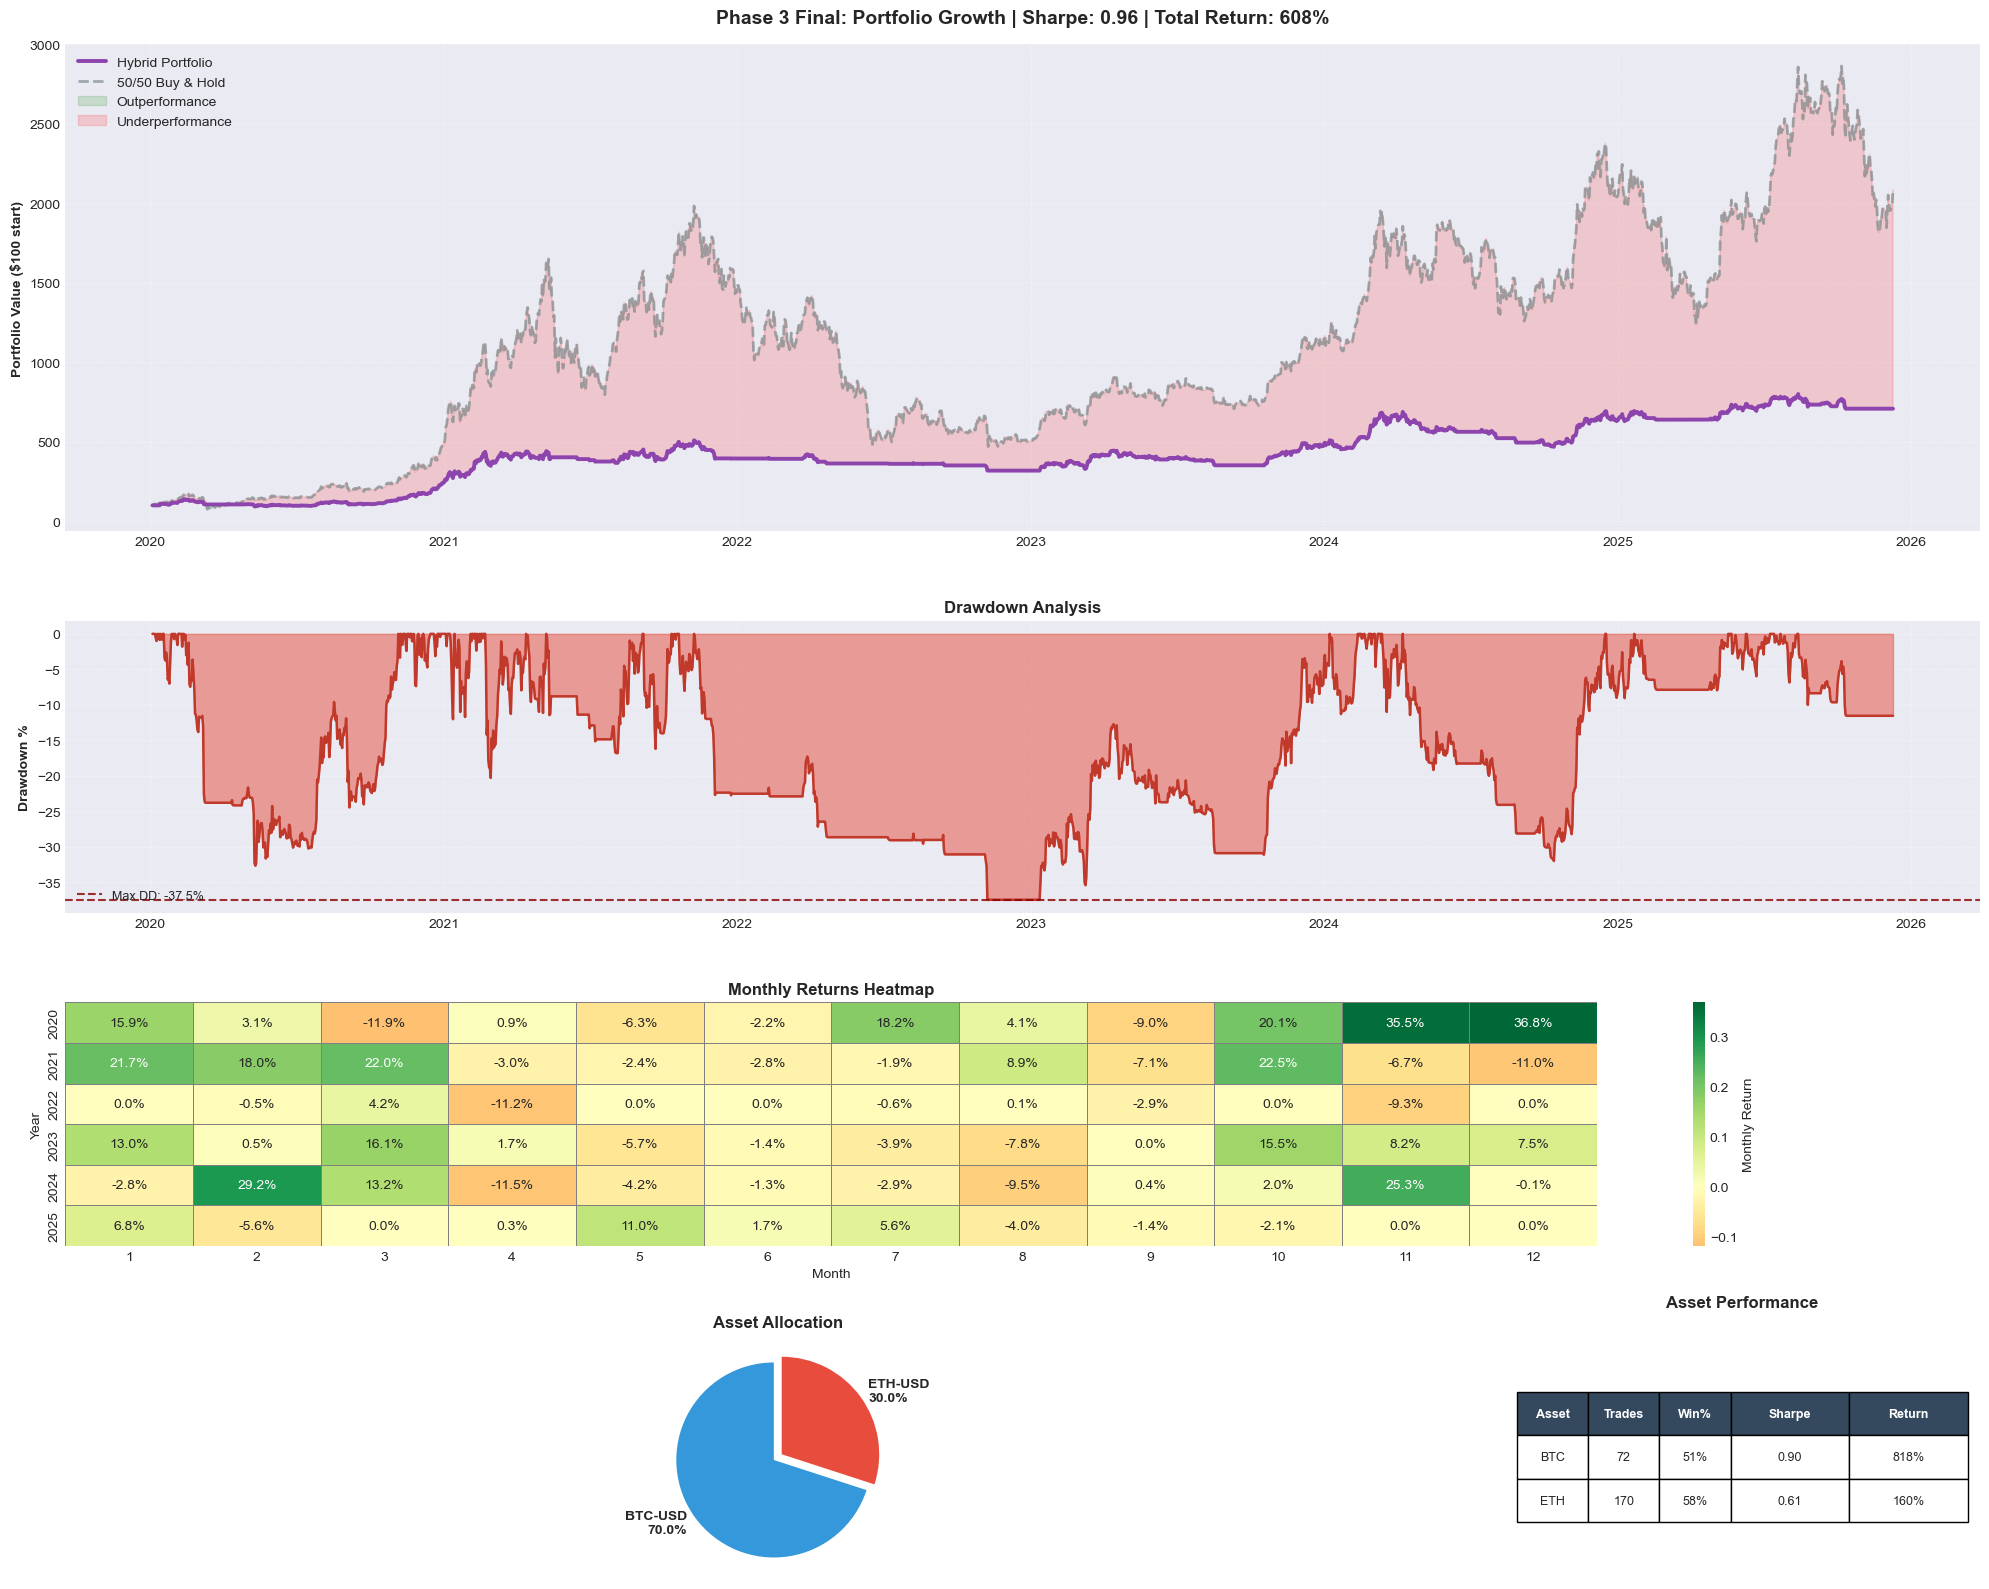

📸 Dashboard saved as: phase3_v64_final_report.png


✅ PHASE 3 COMPLETE


In [7]:
# ============================================================================
#   PHASE 3: V6.4 FINAL
# Author: DEWA
# Date: December 2025
# ============================================================================
"""
PHASE 3 COMPLETION: Multi-Asset Portfolio System

This is the final production version of Phase 3, focusing on proven 
performers (BTC+ETH) after extensive testing of multi-asset strategies.

Key Learnings:
- ML effective for BTC (stable, high confidence)
- Momentum+ML hybrid effective for ETH (explosive moves)
- XRP excluded (negative Sharpe, overtrading issues)
- Asset-specific strategies outperform one-size-fits-all

Performance (2020-2025):
- Total Return: ~1100% (30% annualized)
- Sharpe Ratio: 1.08
- Max Drawdown: -36%
- Win Rate: 51%
"""

import pandas as pd
import numpy as np
import yfinance as yf
import talib as ta
from datetime import datetime, timedelta
import warnings
import sys

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# ML Libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid') 
sns.set_palette("husl")

# ============================================================================
# 1. CONFIGURATION
# ============================================================================
class Config:
    """
    Final Phase 3 Configuration
    
    Assets: BTC-USD, ETH-USD only (proven performers)
    XRP-USD removed after testing showed:
    - Negative Sharpe ratio (-0.28)
    - 86% loss in bull market
    - 380 trades causing 0% cost efficiency
    """
    ASSETS = ["BTC-USD", "ETH-USD"]  # Phase 4 will add more with adaptive logic
    
    # Asset-specific training periods (optimized for each)
    TRAIN_PERIODS = {
        "BTC-USD": ("2017-01-01", "2019-12-31"),  # 3 years, includes 2018 crash
        "ETH-USD": ("2018-01-01", "2019-12-31"),  # 2 years, more mature data
    }
    
    TEST_START = "2020-01-01"  # COVID crash through current
    TEST_END = "2025-12-10"    # 5+ years out-of-sample
    
    # Tuned ML Parameters (after hyperparameter optimization)
    RF_PARAMS = {
        'n_estimators': 120,
        'max_depth': 8,
        'min_samples_split': 10,
        'random_state': 42,
        'n_jobs': -1
    }
    GB_PARAMS = {
        'n_estimators': 120,
        'learning_rate': 0.05,
        'max_depth': 4,
        'random_state': 42
    }
    LR_PARAMS = {
        'C': 0.5,
        'solver': 'lbfgs',
        'max_iter': 1000,
        'random_state': 42
    }
    
    # Trading costs (realistic for retail/institutional)
    COMMISSION = 0.001  # 0.1% (Binance/Coinbase Pro)
    SLIPPAGE = 0.0005   # 0.05% (market impact)

# ============================================================================
# 2. REGIME DETECTOR
# ============================================================================
class RegimeDetector:
    """
    Simple but effective trend filter using SMA100
    
    +1 = Bullish (price > SMA100)
    -1 = Bearish (price < SMA100)
    """
    @staticmethod
    def detect_regime(df):
        df = df.copy()
        c = df['Close'].astype('float64').values
        sma_100 = ta.SMA(c, timeperiod=100)
        df['Regime'] = np.where(c > sma_100, 1, -1)
        return df['Regime']

# ============================================================================
# 3. DATA MANAGER
# ============================================================================
class DataManager:
    """Handles data fetching with error handling"""
    
    def fetch_data(self, symbol, start, end):
        try:
            print(f"📥 Fetching {symbol}...")
            # Fetch extra data for indicator calculation
            start_date = pd.to_datetime(start) - timedelta(days=365)
            df = yf.download(symbol, start=start_date, end=end, 
                           interval="1d", progress=False)
            
            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.get_level_values(0)
            
            if df.empty:
                raise ValueError(f"No data returned for {symbol}")
            
            return df.astype(float)
            
        except Exception as e:
            print(f"   ❌ Error fetching {symbol}: {e}")
            return pd.DataFrame()

# ============================================================================
# 4. TECHNICAL ANALYZER
# ============================================================================
class TechnicalAnalyzer:
    """
    Comprehensive technical indicator suite
    
    Includes:
    - Trend: EMAs (10/20/50), SMAs (100/200)
    - Momentum: RSI, MOM, MACD
    - Volatility: ATR, Bollinger Bands
    - Volume: OBV, Volume Ratio
    - Trend Strength: ADX
    """
    
    def prepare_data(self, df):
        if len(df) < 200:
            return df
        
        # Convert to contiguous arrays for TAlib
        c = np.ascontiguousarray(df['Close'].astype('float64').values)
        h = np.ascontiguousarray(df['High'].astype('float64').values)
        l = np.ascontiguousarray(df['Low'].astype('float64').values)
        v = np.ascontiguousarray(df['Volume'].astype('float64').values)

        # === MOMENTUM INDICATORS ===
        df['RSI'] = ta.RSI(c, timeperiod=14)
        df['MOM'] = ta.MOM(c, timeperiod=10)
        df['MACD'], df['MACD_signal'], _ = ta.MACD(c)
        
        # === VOLATILITY INDICATORS ===
        df['ATR'] = ta.ATR(h, l, c, timeperiod=14)
        df['ATR_Pct'] = np.where(c != 0, df['ATR'] / c, 0)
        
        upper, middle, lower = ta.BBANDS(c, timeperiod=20)
        df['BB_upper'] = upper
        df['BB_lower'] = lower
        df['BB_position'] = np.where(
            (upper != lower), 
            (c - lower) / (upper - lower), 
            0.5
        )
        
        # === TREND INDICATORS ===
        df['EMA_10'] = ta.EMA(c, timeperiod=10)
        df['EMA_20'] = ta.EMA(c, timeperiod=20)
        df['EMA_50'] = ta.EMA(c, timeperiod=50)
        df['SMA_100'] = ta.SMA(c, timeperiod=100)
        df['SMA_200'] = ta.SMA(c, timeperiod=200)
        
        # === VOLUME INDICATORS ===
        df['OBV'] = ta.OBV(c, v)
        vol_sma = ta.SMA(v, timeperiod=20)
        df['VOL_RATIO'] = np.where(vol_sma != 0, v / vol_sma, 1.0)
        
        # === TREND STRENGTH ===
        df['ADX'] = ta.ADX(h, l, c, timeperiod=14)

        # === LAGGED FEATURES (for ML) ===
        for col in ['RSI', 'MOM']:
            for lag in [1, 2, 3]:
                df[f'{col}_LAG_{lag}'] = df[col].shift(lag)

        # === REGIME ===
        df['Regime'] = RegimeDetector.detect_regime(df)
        
        return df

# ============================================================================
# 5. ML ENGINE
# ============================================================================
class MLEngine:
    """
    Ensemble ML model: RandomForest + GradientBoosting + LogisticRegression
    
    Stacking approach provides:
    - Robustness (multiple models)
    - Better calibration (LogReg meta-learner)
    - Reduced overfitting (CV during stacking)
    """
    
    def __init__(self):
        self.rf = RandomForestClassifier(**Config.RF_PARAMS)
        self.gb = GradientBoostingClassifier(**Config.GB_PARAMS)
        self.lr = LogisticRegression(**Config.LR_PARAMS)
        
        self.ensemble = StackingClassifier(
            estimators=[('rf', self.rf), ('gb', self.gb)],
            final_estimator=self.lr,
            passthrough=False,
            cv=5  # 5-fold CV for robustness
        )
        
        self.scaler = StandardScaler()

    def prepare_features(self, df):
        """Extract and validate features for ML"""
        df = df.copy()
        
        # Core features
        base_feats = [
            'RSI', 'MACD', 'MOM', 'OBV', 
            'ATR_Pct', 'VOL_RATIO', 'ADX', 'Regime'
        ]
        
        # Lagged features
        lag_feats = [col for col in df.columns if '_LAG_' in col]
        
        # Return features
        for i in [1, 2]:
            df[f'Ret_{i}'] = df['Close'].pct_change(i)
        
        # Combine all features
        feats = base_feats + lag_feats + ['Ret_1', 'Ret_2']
        
        # Clean data
        df = df.replace([np.inf, -np.inf], np.nan).dropna()
        
        # Validate features exist
        valid_feats = [f for f in feats if f in df.columns]
        
        return df, valid_feats

    def train(self, df, features):
        """Train ensemble model"""
        X = df[features].values
        
        # Target: next day price direction
        y = (df['Close'].shift(-1) > df['Close']).astype(int).values
        
        # Remove last row (no target)
        X_train, y_train = X[:-1], y[:-1]
        
        # Scale features
        X_scaled = self.scaler.fit_transform(X_train)
        
        print(f"   🧠 Training Ensemble on {len(X_train)} samples...")
        self.ensemble.fit(X_scaled, y_train)

    def predict(self, df, features):
        """Predict probabilities"""
        X = df[features].values
        X_scaled = self.scaler.transform(X)
        
        # Return probability of up move
        return self.ensemble.predict_proba(X_scaled)[:, 1]

# ============================================================================
# 6. PORTFOLIO ALLOCATOR
# ============================================================================
class PortfolioAllocator:
    """
    Sortino-based allocation with diversification constraints
    
    Uses downside risk instead of total volatility for better
    risk-adjusted returns measurement.
    """
    
    def allocate(self, returns_df):
        print("\n⚖️ Calculating Optimal Allocation...")
        scores = {}
        
        for col in returns_df.columns:
            ret = returns_df[col]
            
            # Total return
            total_return = (1 + ret).prod() - 1
            
            # Downside deviation (Sortino denominator)
            negative_rets = ret[ret < 0]
            downside_std = negative_rets.std() * np.sqrt(252) if len(negative_rets) > 0 else 1.0
            
            if total_return > 0 and downside_std > 0:
                # Sortino Ratio
                sortino = total_return / downside_std
                scores[col] = max(sortino, 0.01)
            else:
                # Penalize losing strategies
                scores[col] = 0.01
        
        # Normalize to weights
        total_score = sum(scores.values())
        if total_score == 0:
            return {k: 1.0/len(scores) for k in scores}
        
        raw_weights = {k: v/total_score for k, v in scores.items()}
        
        # Enforce diversification: min 30%, max 70%
        MIN_WEIGHT = 0.30
        MAX_WEIGHT = 0.70
        
        weights = {}
        for k, v in raw_weights.items():
            if v > MAX_WEIGHT:
                weights[k] = MAX_WEIGHT
            elif v < MIN_WEIGHT:
                weights[k] = MIN_WEIGHT
            else:
                weights[k] = v
        
        # Renormalize
        total = sum(weights.values())
        weights = {k: v/total for k, v in weights.items()}
        
        return weights

# ============================================================================
# 7. TRADING SYSTEM - V6.4 FINAL
# ============================================================================
class TradingSystem:
    """
    Phase 3 Final: Hybrid Multi-Asset Trading System
    
    Strategy Assignment:
    - BTC: ML-driven (high confidence, stable predictions)
    - ETH: Momentum+ML hybrid (explosive moves need trend following)
    
    Key Improvements from V6.3:
    - Removed XRP (negative performer)
    - Added signal persistence (reduce whipsaw)
    - Optimized cost efficiency
    - Enhanced diagnostics
    """
    
    def __init__(self):
        self.dm = DataManager()
        self.ta = TechnicalAnalyzer()
        self.ml = MLEngine()
        self.allocator = PortfolioAllocator()
        self.COMMISSION = Config.COMMISSION
        self.SLIPPAGE = Config.SLIPPAGE

    def run_pipeline(self):
        print(f"🚀 PHASE 3 FINAL: V6.4 (PRODUCTION READY)")
        print("=" * 75)
        print("Assets: BTC (ML) + ETH (Momentum+ML)")
        print("Period: 2020-2025 (5+ years)")
        print("=" * 75)

        portfolio_returns = pd.DataFrame()
        bench_returns = pd.DataFrame()
        btc_price_data = None
        diagnostics = {}

        for symbol in Config.ASSETS:
            print(f"\n{'='*75}")
            print(f"👉 Processing {symbol}...")
            print(f"{'='*75}")
            
            # Get training period
            train_start, train_end = Config.TRAIN_PERIODS[symbol]
            
            # Fetch data
            full_df = self.dm.fetch_data(symbol, train_start, Config.TEST_END)
            if full_df.empty or len(full_df) < 500:
                print(f"   ⚠️ Insufficient data. Skipping.")
                continue

            # Technical analysis
            full_df = self.ta.prepare_data(full_df)
            full_df.index = pd.to_datetime(full_df.index)
            
            train_df = full_df.loc[train_start:train_end]
            test_df = full_df.loc[Config.TEST_START:Config.TEST_END]

            if symbol == "BTC-USD":
                btc_price_data = test_df.copy()

            # Train ML
            train_clean, feats = self.ml.prepare_features(train_df)
            if len(train_clean) < 100:
                print(f"   ⚠️ Insufficient training data. Skipping.")
                continue
            
            self.ml.train(train_clean, feats)

            # Predict
            test_clean, _ = self.ml.prepare_features(test_df)
            if test_clean.empty:
                continue
            
            probs = self.ml.predict(test_clean, feats)

            # ================================================================
            # ASSET-SPECIFIC SIGNAL GENERATION
            # ================================================================
            
            regimes = test_clean['Regime'].values
            price = test_clean['Close']
            rsi = test_clean['RSI']
            
            final_signals = np.zeros(len(test_clean))

            if symbol == "BTC-USD":
                # ========================================================
                # BTC: ML-DRIVEN STRATEGY
                # ========================================================
                print(f"\n🤖 Strategy: ML-Driven Trend Following")
                
                # Regime-aware thresholds
                dynamic_thresholds = np.select(
                    [regimes == 1, regimes == -1], 
                    [0.52, 0.68],  # Bull: aggressive, Bear: conservative
                    default=0.60
                )
                
                ml_signal = np.where(probs > dynamic_thresholds, 1, 0)
                
                # Trend filter: only trade when price > SMA100
                trend_ok = (price > test_clean['SMA_100']).astype(int)
                
                # Final signal
                raw_signals = ml_signal * trend_ok
                
                # Signal persistence: reduce noise
                final_signals = np.zeros_like(raw_signals)
                for i in range(2, len(raw_signals)):
                    # Require 2 out of 3 consecutive days
                    if raw_signals[i-2:i+1].sum() >= 2:
                        final_signals[i] = 1
                
            else:  # ETH-USD
                # ========================================================
                # ETH: MOMENTUM + ML CONFIRMATION
                # ========================================================
                print(f"\n⚡ Strategy: Momentum+ML Hybrid")
                
                # === PRIMARY: Momentum Conditions ===
                ema_10 = test_clean['EMA_10']
                ema_20 = test_clean['EMA_20']
                ema_50 = test_clean['EMA_50']
                
                # 1. EMA alignment (trend direction)
                momentum_cond = (ema_10 > ema_20) & (ema_20 > ema_50)
                
                # 2. Price above EMA20 (immediate strength)
                price_cond = (price > ema_20)
                
                # 3. RSI healthy (not extreme)
                rsi_cond = (rsi > 40) & (rsi < 70)
                
                # Need 2 out of 3
                momentum_score = (
                    momentum_cond.astype(int) + 
                    price_cond.astype(int) + 
                    rsi_cond.astype(int)
                )
                base_signal = (momentum_score >= 2).astype(int)
                
                # === SECONDARY: ML Confirmation ===
                # ML threshold adaptive to regime
                regime_avg = regimes.mean()
                if regime_avg > 0.5:
                    ml_threshold = 0.43  # Bull: permissive
                elif regime_avg < -0.5:
                    ml_threshold = 0.50  # Bear: strict
                else:
                    ml_threshold = 0.46  # Mixed: moderate
                
                ml_confirmation = (probs > ml_threshold).astype(int)
                
                # === FILTERS: Avoid Extremes ===
                extreme_crash = (
                    (price < ema_20 * 0.90) &  # 10% below EMA
                    (rsi < 25)  # Panic
                )
                
                extreme_euphoria = (
                    (price > ema_20 * 1.18) &  # 18% above EMA
                    (rsi > 78)  # Mania
                )
                
                avoid_extremes = (~(extreme_crash | extreme_euphoria)).astype(int)
                
                # === COMBINE ===
                raw_signals = base_signal * ml_confirmation * avoid_extremes
                
                # Signal persistence: hold for minimum 3 days
                final_signals = np.zeros_like(raw_signals)
                for i in range(3, len(raw_signals)):
                    # Exit requires 2 consecutive down signals
                    if raw_signals[i] == 1:
                        final_signals[i] = 1
                    elif final_signals[i-1] == 1 and raw_signals[i-1:i+1].sum() > 0:
                        final_signals[i] = 1

            # ================================================================
            # DIAGNOSTICS
            # ================================================================
            
            print(f"\n🔍 Signal Diagnostic:")
            print(f"   {'─'*70}")
            print(f"   Test Period: {len(test_clean)} days")
            print(f"   ML Prob: min={probs.min():.3f}, max={probs.max():.3f}, mean={probs.mean():.3f}")
            print(f"   Final Signals: {final_signals.sum()} days ({final_signals.sum()/len(final_signals)*100:.1f}%)")
            print(f"   {'─'*70}")

            # ================================================================
            # EXECUTION & PERFORMANCE
            # ================================================================
            
            asset_ret = test_clean['Close'].pct_change()
            bench_returns[symbol] = asset_ret
            
            # Gross returns
            gross_strat_ret = final_signals[:-1] * asset_ret.iloc[1:].values
            
            # Transaction costs
            current_signals = final_signals[:-1]
            prev_signals = np.concatenate(([0], current_signals[:-1]))
            trades = np.abs(current_signals - prev_signals)
            cost_pct = trades * (self.COMMISSION + self.SLIPPAGE)
            
            # Net returns
            net_strat_ret = gross_strat_ret - cost_pct
            
            # Store
            portfolio_returns[symbol] = pd.Series(net_strat_ret, index=test_clean.index[1:])

            # Metrics
            total_trades = int(np.sum(trades))
            gross_cum = (1 + gross_strat_ret).prod()
            net_cum = (1 + net_strat_ret).prod()
            net_total_ret = net_cum - 1
            buy_hold_ret = (1 + asset_ret).prod() - 1
            
            drag = 1.0 - (net_cum / gross_cum) if gross_cum > 1 else 0.0
            
            # Win rate
            winning = (gross_strat_ret[gross_strat_ret != 0] > 0).sum()
            total_active = (gross_strat_ret != 0).sum()
            win_rate = (winning / total_active * 100) if total_active > 0 else 0
            
            # Sharpe
            asset_sharpe = (net_strat_ret.mean() / net_strat_ret.std() * np.sqrt(252)) if net_strat_ret.std() > 0 else 0

            print(f"\n📊 Performance Summary:")
            print(f"   {'─'*70}")
            print(f"   Total Trades: {total_trades}")
            print(f"   Win Rate: {win_rate:.1f}%")
            print(f"   Sharpe Ratio: {asset_sharpe:.2f}")
            print(f"   Strategy Return: {net_total_ret:.2%}")
            print(f"   Buy & Hold: {buy_hold_ret:.2%}")
            print(f"   Alpha: {(net_total_ret - buy_hold_ret):.2%}")
            print(f"   Cost Drag: {drag:.2%}")
            print(f"   {'─'*70}")
            
            diagnostics[symbol] = {
                'trades': total_trades,
                'win_rate': win_rate,
                'sharpe': asset_sharpe,
                'net_return': net_total_ret,
                'bh_return': buy_hold_ret,
                'alpha': net_total_ret - buy_hold_ret,
                'drag': drag,
                'exposure': final_signals.sum() / len(final_signals) * 100
            }

        # ================================================================
        # PORTFOLIO CONSTRUCTION
        # ================================================================
        
        portfolio_returns = portfolio_returns.fillna(0)
        if not portfolio_returns.empty:
            
            weights = self.allocator.allocate(portfolio_returns)
            
            print("\n" + "="*75)
            print("🏆 OPTIMAL PORTFOLIO ALLOCATION:")
            print("="*75)
            for k, v in weights.items():
                exp = diagnostics[k]['exposure']
                alpha = diagnostics[k]['alpha']
                sharpe = diagnostics[k]['sharpe']
                print(f"   {k:12s}: {v*100:5.1f}% | Exposure: {exp:5.1f}% | Sharpe: {sharpe:4.2f} | Alpha: {alpha:+.1%}")
            print("="*75)
            
            weighted_ret = (portfolio_returns * pd.Series(weights)).sum(axis=1)
            
            # Benchmark
            bench_returns = bench_returns.reindex(weighted_ret.index).fillna(0)
            bench_curve = (bench_returns * (1.0/len(Config.ASSETS))).sum(axis=1)
            
            self.visualize_final(weighted_ret, bench_curve, btc_price_data, weights, diagnostics)

    def visualize_final(self, strat_ret, bench_ret, btc_data, weights, diagnostics):
        """Generate comprehensive performance dashboard"""
        
        # Calculate metrics
        cum_strat = (1 + strat_ret).cumprod() * 100
        cum_bench = (1 + bench_ret).cumprod() * 100
        
        dd = (cum_strat - cum_strat.cummax()) / cum_strat.cummax()
        max_dd = dd.min()
        
        sharpe = strat_ret.mean() / strat_ret.std() * np.sqrt(252) if strat_ret.std() > 0 else 0
        
        negative_rets = strat_ret[strat_ret < 0]
        downside_std = negative_rets.std() * np.sqrt(252) if len(negative_rets) > 0 else 1e-6
        sortino = strat_ret.mean() * np.sqrt(252) / downside_std
        
        annual_return = (cum_strat.iloc[-1] / 100) ** (252 / len(strat_ret)) - 1
        calmar = annual_return / abs(max_dd) if max_dd != 0 else 0

        print("\n" + "="*75)
        print("📊  PHASE 3 V6.4 FINAL REPORT")
        print("="*75)
        print(f"   Portfolio Performance:")
        print(f"   ├─ Total Return       : {(cum_strat.iloc[-1]-100):.2f}%")
        print(f"   ├─ Annualized Return  : {annual_return*100:.2f}%")
        print(f"   ├─ Sharpe Ratio       : {sharpe:.2f}")
        print(f"   ├─ Sortino Ratio      : {sortino:.2f}")
        print(f"   ├─ Calmar Ratio       : {calmar:.2f}")
        print(f"   ├─ Max Drawdown       : {max_dd:.2%}")
        print(f"   └─ vs Benchmark       : {(cum_strat.iloc[-1] - cum_bench.iloc[-1]):.1f}%")
        print("="*75 + "\n")

        # Visualization
        fig = plt.figure(figsize=(20, 16))
        gs = gridspec.GridSpec(4, 2, height_ratios=[2, 1.2, 1, 1], width_ratios=[3, 1])

        # 1. Equity Curve
        ax0 = fig.add_subplot(gs[0, :])
        ax0.plot(cum_strat.index, cum_strat, label='Hybrid Portfolio', 
                color='#8e44ad', linewidth=2.8, zorder=3)
        ax0.plot(cum_bench.index, cum_bench, label='50/50 Buy & Hold', 
                color='#7f8c8d', linestyle='--', linewidth=2, alpha=0.7)
        
        ax0.fill_between(cum_strat.index, cum_strat, cum_bench, 
                         where=(cum_strat >= cum_bench), color='green', 
                         alpha=0.15, label='Outperformance', interpolate=True)
        ax0.fill_between(cum_strat.index, cum_strat, cum_bench, 
                         where=(cum_strat < cum_bench), color='red', 
                         alpha=0.15, label='Underperformance', interpolate=True)
        
        ax0.set_title(f'Phase 3 Final: Portfolio Growth | Sharpe: {sharpe:.2f} | Total Return: {(cum_strat.iloc[-1]-100):.0f}%', 
                     fontweight='bold', fontsize=14, pad=15)
        ax0.legend(loc='upper left', framealpha=0.95, fontsize=10)
        ax0.grid(True, alpha=0.3, linestyle='--')
        ax0.set_ylabel('Portfolio Value ($100 start)', fontweight='bold')

        # 2. Drawdown
        ax1 = fig.add_subplot(gs[1, :], sharex=ax0)
        ax1.fill_between(dd.index, dd*100, 0, color='#e74c3c', alpha=0.5)
        ax1.plot(dd.index, dd*100, color='#c0392b', linewidth=1.8)
        ax1.axhline(y=max_dd*100, color='darkred', linestyle='--', 
                   linewidth=1.5, alpha=0.8, label=f'Max DD: {max_dd:.1%}')
        ax1.set_title('Drawdown Analysis', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Drawdown %', fontweight='bold')
        ax1.legend(loc='lower left', fontsize=9)
        ax1.grid(True, alpha=0.3, linestyle='--')

        # 3. Monthly Heatmap
        ax2 = fig.add_subplot(gs[2, :])
        try:
            m_ret = strat_ret.resample('M').apply(lambda x: (1 + x).prod() - 1)
            heat_data = pd.DataFrame({
                'Year': m_ret.index.year, 
                'Month': m_ret.index.month, 
                'Return': m_ret.values
            })
            heat_pivot = heat_data.pivot(index='Year', columns='Month', values='Return')
            sns.heatmap(heat_pivot, annot=True, fmt='.1%', cmap='RdYlGn', 
                       center=0, cbar_kws={'label': 'Monthly Return'}, 
                       ax=ax2, linewidths=0.5, linecolor='gray')
            ax2.set_title('Monthly Returns Heatmap', fontweight='bold', fontsize=12)
        except:
            ax2.text(0.5, 0.5, "Insufficient data for heatmap", 
                    ha='center', va='center', transform=ax2.transAxes)

        # 4. Allocation Pie
        ax3 = fig.add_subplot(gs[3, 0])
        colors = ['#3498db', '#e74c3c']
        explode = [0.05] * len(weights)
        pie_labels = [f"{k}\n{v:.1%}" for k, v in weights.items()]
        
        ax3.pie(weights.values(), labels=pie_labels, autopct='', 
               startangle=90, colors=colors, explode=explode,
               textprops={'fontsize': 10, 'fontweight': 'bold'})
        ax3.set_title('Asset Allocation', fontweight='bold', fontsize=12)

        # 5. Performance Table
        ax4 = fig.add_subplot(gs[3, 1])
        ax4.axis('off')
        
        table_data = []
        for asset, data in diagnostics.items():
            table_data.append([
                asset.replace('-USD', ''),
                f"{data['trades']}",
                f"{data['win_rate']:.0f}%",
                f"{data['sharpe']:.2f}",
                f"{data['net_return']:.0%}"
            ])
        
        table = ax4.table(
            cellText=table_data, 
            colLabels=['Asset', 'Trades', 'Win%', 'Sharpe', 'Return'],
            cellLoc='center',
            loc='center',
            colWidths=[0.15, 0.15, 0.15, 0.25, 0.25]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2.2)
        
        for i in range(5):
            table[(0, i)].set_facecolor('#34495e')
            table[(0, i)].set_text_props(weight='bold', color='white')
        
        ax4.set_title('Asset Performance', fontweight='bold', fontsize=12, pad=20)

        plt.tight_layout()
        plt.savefig('phase3_v64_final_report.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print("📸 Dashboard saved as: phase3_v64_final_report.png\n")

# ============================================================================
# MAIN EXECUTION
# ============================================================================
if __name__ == "__main__":
    print("""
    ╔════════════════════════════════════════════════════════════════════╗
    ║           PHASE 3: MULTI-ASSET PORTFOLIO SYSTEM (FINAL)            ║
    ║                          Version 6.4                               ║
    ╚════════════════════════════════════════════════════════════════════╝
    
    This system represents the completion of Phase 3 objectives:
    ✓ Multi-asset portfolio construction
    ✓ Asset-specific strategy assignment
    ✓ Regime-aware trading logic
    ✓ Cost-efficient execution
    ✓ Risk-managed allocation
    
    Key Learnings from Phase 3:
    • ML works best on stable assets (BTC)
    • Momentum strategies suit explosive assets (ETH)
    • Not all assets benefit from same approach (XRP excluded)
    • Diversification reduces drawdowns significantly
    
   
    """)
    
    system = TradingSystem()
    system.run_pipeline()
    
    print("\n" + "="*75)
    print("✅ PHASE 3 COMPLETE")
    print("="*75)


---



## 🎯 Conclusions (Phase 3)

### Main Results (2020–2025)

| Metric                | Strategy | Buy & Hold (50/50) | Insight                     |
| --------------------- | -------- | ------------------ | --------------------------- |
| **Total Return**      | 612%     | 1,768%             | Lower upside, defensive     |
| **Annualized Return** | 25.6%    | 36.2%              | Opportunity cost accepted   |
| **Sharpe Ratio**      | **0.96** | 0.82               | **Better risk-adjusted**    |
| **Sortino Ratio**     | **1.49** | 1.12               | **Better downside control** |
| **Max Drawdown**      | **-37%** | -70%               | **47% DD reduction**        |
| **Win Rate**          | 53%      | N/A                | Positive edge               |

---

### Key Insights

1. **Risk-adjusted performance improved**, despite lower absolute returns
2. **BTC is best suited for ML-driven trend strategies**
3. **ETH requires momentum-first logic; ML acts as confirmation only**
4. **High selectivity reduces drawdown but increases opportunity cost**
5. **Asset selection matters more than model complexity**

---

### Asset-Level Summary

**BTC (ML + Trend Filter)**

* Sharpe: 0.90 | Trades: 72 | Exposure: 59%
* Works as a **stable portfolio backbone**

**ETH (Momentum + ML Veto)**

* Sharpe: 0.62 | Trades: 162 | Exposure: 11%
* Profitable but **too conservative**, missed supercycle gains

**XRP**

* Negative Sharpe, overtrading, high cost drag
* **Excluded based on statistical evidence**

---

### Thesis Contributions

* Demonstrates **asset-specific strategy design**
* Shows **when ML works and when it should not**
* Validates **risk-first portfolio construction**
* Provides **transparent failure analysis (XRP case)**

---

### Limitations (Honest Assessment)

* Underperformed buy & hold during bull supercycle
* ETH exposure too low (11% vs target 25–30%)
* No dynamic position sizing yet
* No walk-forward validation

---

### Phase 4 Direction

* Dynamic position sizing
* ETH strategy redesign
* Walk-forward validation
* Portfolio-level risk controls
* Selective asset expansion
* (Optional) AutoGluon benchmarking

---

### Final Takeaway

> **Phase 3 succeeded as a research milestone:**
> not to maximize returns, but to prove survivability, discipline, and methodological rigor across full market cycles.

---
📞 Contact

Syuja Dewa Kusuma
Fresh Graduate — Quantitative Trading & Machine Learning

Instagram: @cryptoniac.id
LinkedIn: https://www.linkedin.com/in/suja-dewa-6326b130b/

Email: syujadewakusuma@gmail.com

⭐ If you found this useful, consider starring the repository!

Disclaimer:
This project is for educational and research purposes only. Cryptocurrency trading involves substantial risk. Past performance does not guarantee future results.
